<a href="https://colab.research.google.com/github/IshanKapadia-Data/Walmart-Sales-Forecasting/blob/main/Walmart_SalesForecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Walmart Sales Forecasting
This project aims to forecast weekly sales for Walmart stores using historical sales data and economic indicators. We explore seasonality, holiday effects, and economic trends to build a robust regression model.


## Data Cleaning & Preprocessing

In this section, we perform key preprocessing tasks:
- Convert date columns and extract time-based features
- Rename columns for clarity
- Engineer seasonality and weekend indicators
- Compute 4-week rolling average sales
- Check for duplicates, missing values, and outliers


Duplicate rows: 0

Missing values per column:
 Store                0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
CPI                  0
Unemployment         0
Year                 0
Month                0
Week                 0
DayOfWeek            0
Is_Weekend           0
Season               0
Rolling_4wk_Sales    0
dtype: int64

Data types:
 Store                         int64
Date                 datetime64[ns]
Weekly_Sales                float64
IsHoliday                     int64
Temperature                 float64
Fuel_Price                  float64
CPI                         float64
Unemployment                float64
Year                          int32
Month                         int32
Week                         UInt32
DayOfWeek                     int32
Is_Weekend                    int64
Season                       object
Rolling_4wk_Sales           float64
dtype: object


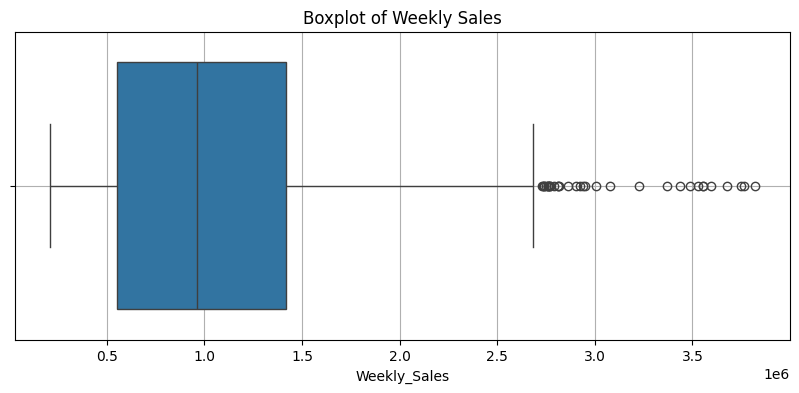

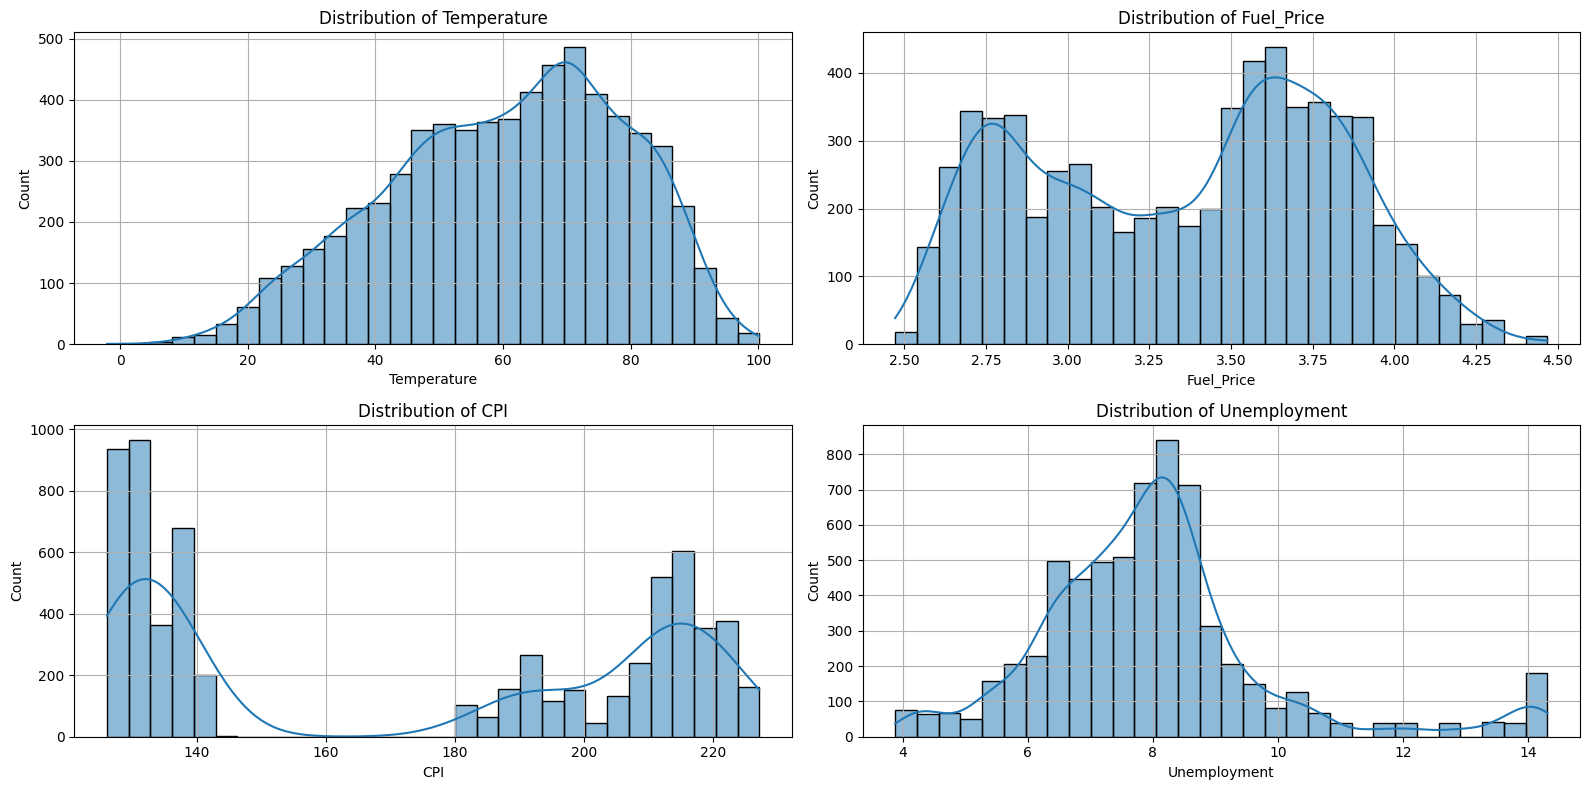


Cleaned dataset saved as 'Walmart_Cleaned.csv'


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "Walmart.csv"
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Rename column for clarity
df.rename(columns={'Holiday_Flag': 'IsHoliday'}, inplace=True)

# Create temporal features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Is_Weekend'] = df['DayOfWeek'].isin([5, 6]).astype(int)

# Add season feature
def get_season(month):
    return (
        'Winter' if month in [12, 1, 2] else
        'Spring' if month in [3, 4, 5] else
        'Summer' if month in [6, 7, 8] else
        'Fall'
    )

df['Season'] = df['Month'].apply(get_season)

# Sort and calculate 4-week rolling average of sales per store
df.sort_values(by=['Store', 'Date'], inplace=True)
df['Rolling_4wk_Sales'] = df.groupby('Store')['Weekly_Sales'] \
    .transform(lambda x: x.rolling(window=4, min_periods=1).mean())

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

# Check for missing values
print("\nMissing values per column:\n", df.isnull().sum())

# Check data types
print("\nData types:\n", df.dtypes)

# Visualize outliers in Weekly_Sales
plt.figure(figsize=(10, 4))
sns.boxplot(x='Weekly_Sales', data=df)
plt.title('Boxplot of Weekly Sales')
plt.grid(True)
plt.show()

# Distribution plots for numerical features
num_features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
plt.figure(figsize=(16, 8))
for i, col in enumerate(num_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.grid(True)
plt.tight_layout()
plt.show()

# Save cleaned dataset
df.to_csv("Walmart_Cleaned.csv", index=False)
print("\nCleaned dataset saved as 'Walmart_Cleaned.csv'")


## Exploratory Data Analysis (EDA)

This section provides a comprehensive overview of weekly sales patterns, store-wise behavior, holiday impact, seasonal trends, and volatility. It helps identify meaningful features and potential business drivers.


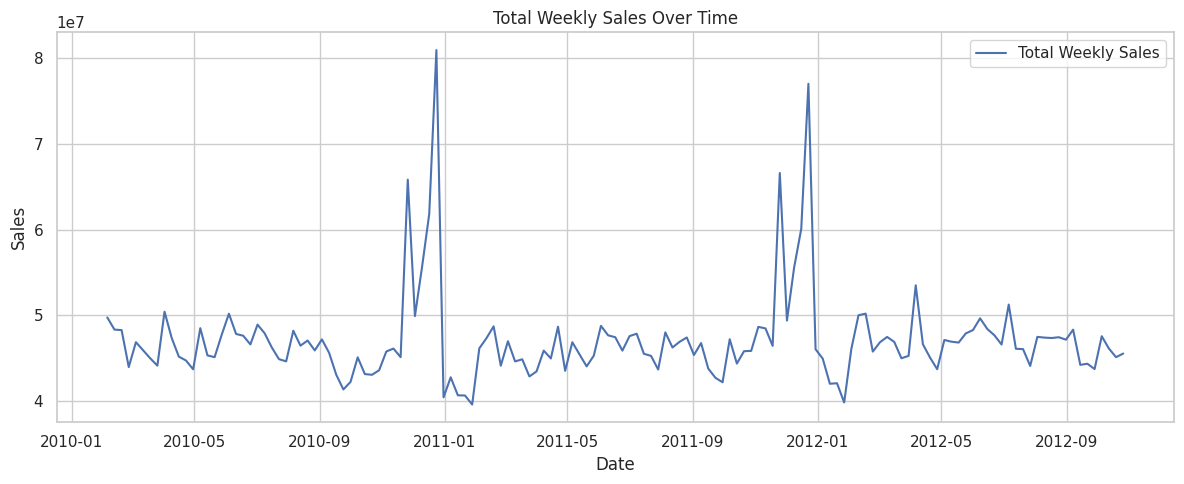

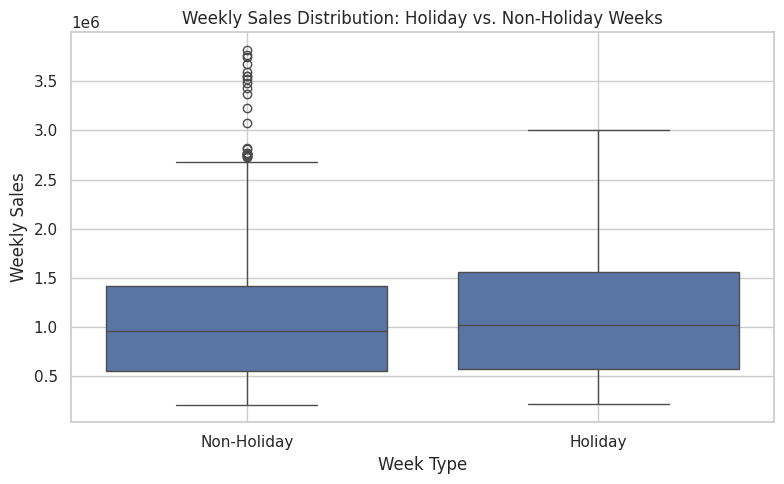

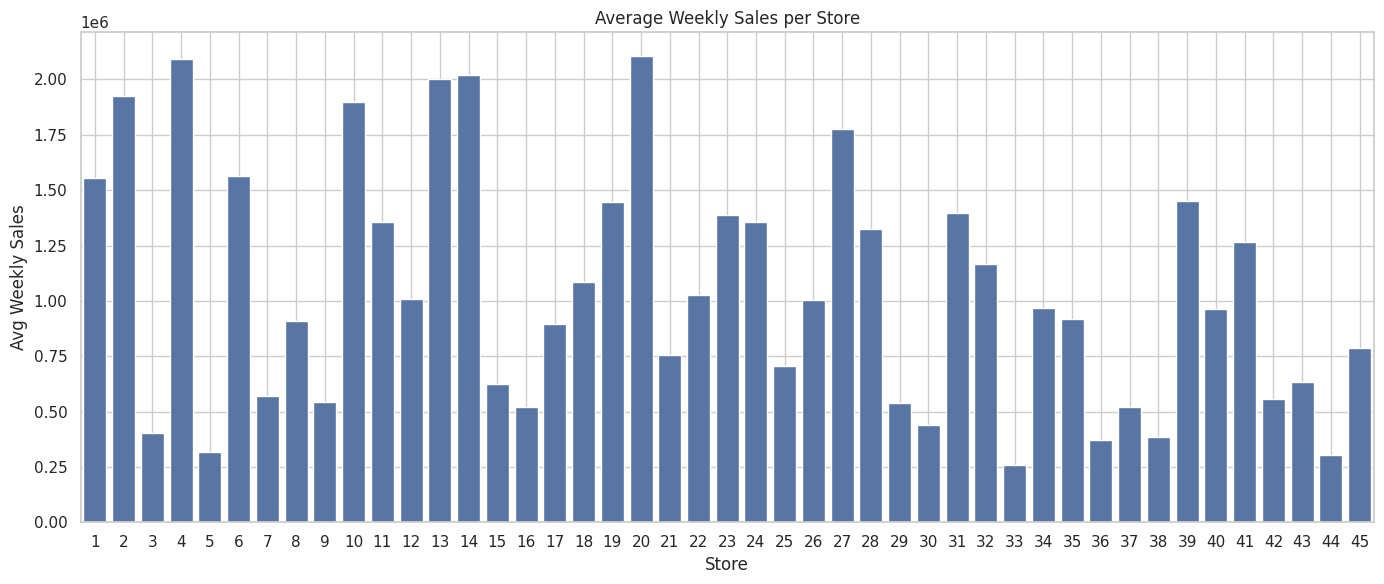

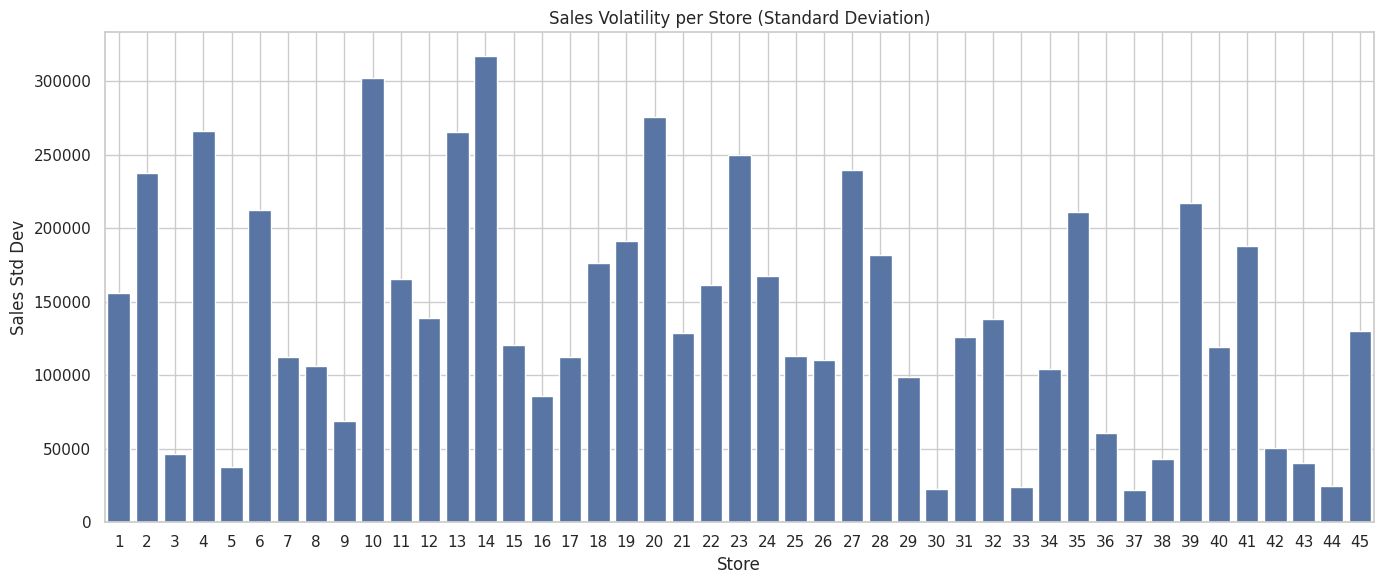

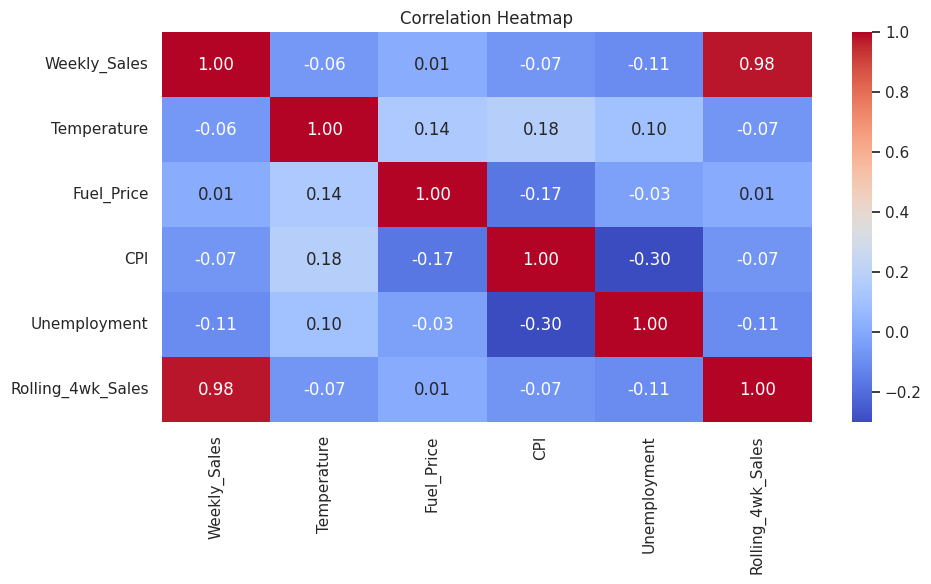

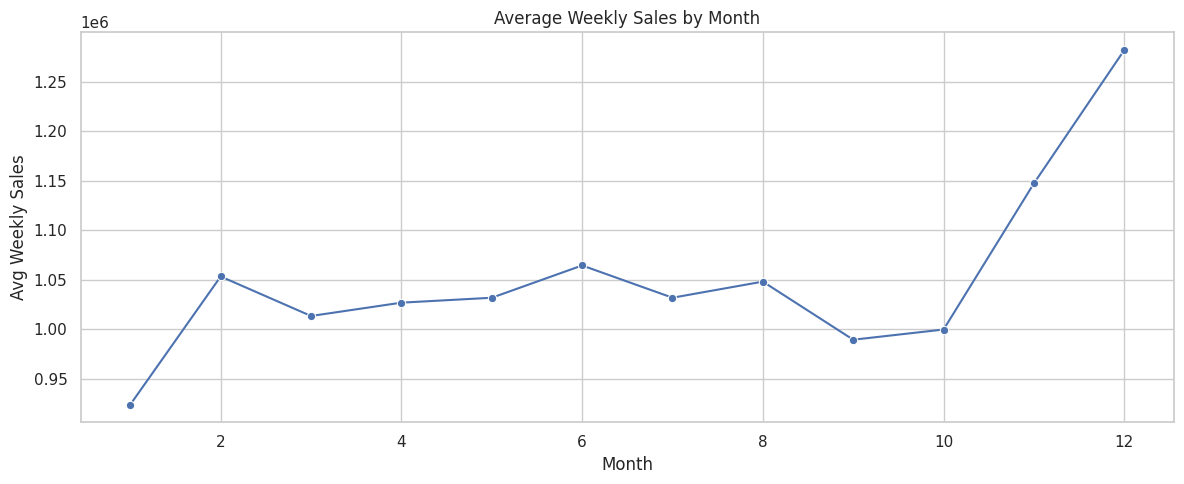

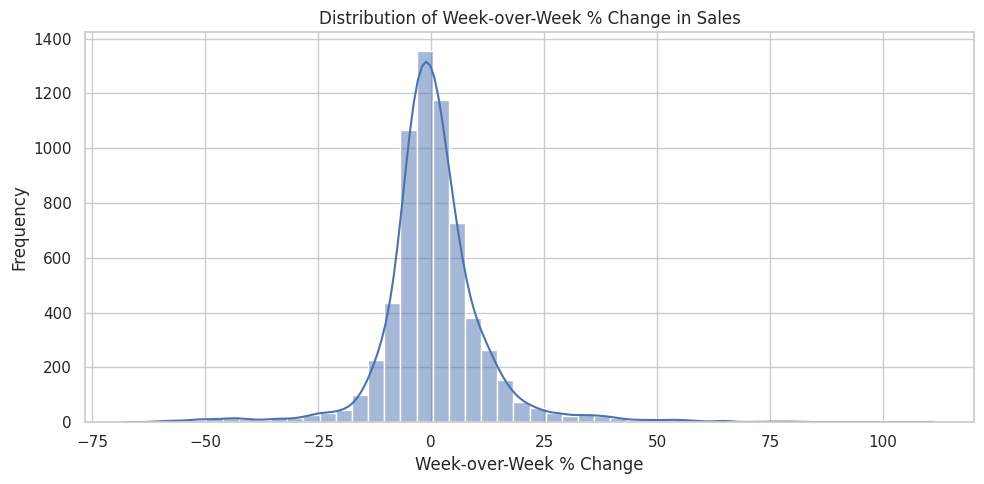

Summary of Week-over-Week % Change:
count    6390.000000
mean        0.666219
std        11.896114
min       -67.607902
25%        -4.391317
50%        -0.177811
75%         4.836088
max       111.193449
Name: WoW_Change, dtype: float64


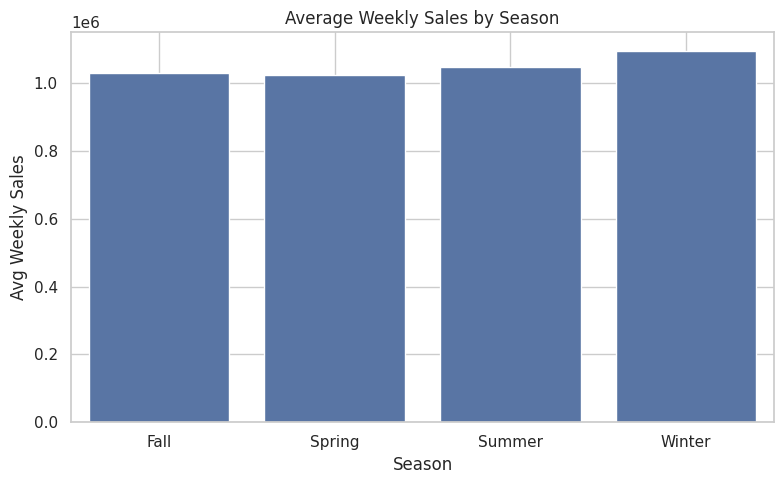

Top 5 Stores by Average Sales:
 Store
20    2.107677e+06
4     2.094713e+06
14    2.020978e+06
13    2.003620e+06
2     1.925751e+06
Name: Weekly_Sales, dtype: float64

Seasonal Sales Averages:
 Season
Winter    1.094937e+06
Summer    1.047623e+06
Fall      1.030432e+06
Spring    1.023801e+06
Name: Weekly_Sales, dtype: float64


In [2]:
# Exploratory Data Analysis (EDA)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style='whitegrid')

# Load cleaned data
df = pd.read_csv("Walmart_Cleaned.csv", parse_dates=['Date'])

# --- A. Total Weekly Sales Over Time ---
plt.figure(figsize=(12, 5))
weekly_total = df.groupby('Date')['Weekly_Sales'].sum()
plt.plot(weekly_total.index, weekly_total.values, label='Total Weekly Sales')
plt.title('Total Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- B. Holiday vs Non-Holiday Sales ---
plt.figure(figsize=(8, 5))
sns.boxplot(x='IsHoliday', y='Weekly_Sales', data=df)
plt.title('Weekly Sales Distribution: Holiday vs. Non-Holiday Weeks')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.xlabel('Week Type')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

# --- C. Store-wise Average Weekly Sales ---
plt.figure(figsize=(14, 6))
store_avg = df.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=False)
sns.barplot(x=store_avg.index, y=store_avg.values)
plt.title('Average Weekly Sales per Store')
plt.xlabel('Store')
plt.ylabel('Avg Weekly Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

# --- D. Sales Volatility (Std Dev) per Store ---
plt.figure(figsize=(14, 6))
store_std = df.groupby('Store')['Weekly_Sales'].std().sort_values(ascending=False)
sns.barplot(x=store_std.index, y=store_std.values)
plt.title('Sales Volatility per Store (Standard Deviation)')
plt.xlabel('Store')
plt.ylabel('Sales Std Dev')
plt.grid(True)
plt.tight_layout()
plt.show()

# --- E. Correlation Heatmap ---
plt.figure(figsize=(10, 6))
corr_matrix = df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Rolling_4wk_Sales']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# --- F. Monthly & Seasonal Sales Averages ---
# Monthly
plt.figure(figsize=(12, 5))
monthly_avg = df.groupby('Month')['Weekly_Sales'].mean()
sns.lineplot(x=monthly_avg.index, y=monthly_avg.values, marker='o')
plt.title('Average Weekly Sales by Month')
plt.xlabel('Month')
plt.ylabel('Avg Weekly Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

# --- G. Week-over-Week % Change in Sales ---

# Sort by store and date to ensure correct WoW calculation
df = df.sort_values(by=['Store', 'Date'])

# Calculate Week-over-Week % Change
df['WoW_Change'] = df.groupby('Store')['Weekly_Sales'].pct_change() * 100

# Filter out extreme outliers for visualization clarity
filtered_wow = df[(df['WoW_Change'] < 200) & (df['WoW_Change'] > -200)]

# Plot histogram of WoW % change
plt.figure(figsize=(10, 5))
sns.histplot(filtered_wow['WoW_Change'], bins=50, kde=True)
plt.title('Distribution of Week-over-Week % Change in Sales')
plt.xlabel('Week-over-Week % Change')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: Print summary statistics
print("Summary of Week-over-Week % Change:")
print(filtered_wow['WoW_Change'].describe())

# Seasonal
plt.figure(figsize=(8, 5))
seasonal_avg = df.groupby('Season')['Weekly_Sales'].mean()
sns.barplot(x=seasonal_avg.index, y=seasonal_avg.values)
plt.title('Average Weekly Sales by Season')
plt.xlabel('Season')
plt.ylabel('Avg Weekly Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Top 5 Stores by Average Sales:\n", store_avg.head())
print("\nSeasonal Sales Averages:\n", seasonal_avg.sort_values(ascending=False))


## Feature Engineering

We engineer predictive features from the time-series structure and calendar context, including:
- Lag features to capture historical dependencies
- Week-over-week change to reflect sales volatility
- Month start/end indicators
- Categorical encoding for season and store


In [3]:
import pandas as pd
import numpy as np

# Load cleaned dataset (from Step 2 output)
df = pd.read_csv("Walmart_Cleaned.csv", parse_dates=['Date'])

# Sort by store and date to preserve time-series order
df = df.sort_values(by=['Store', 'Date'])

# -------------------------------
# 1. Lag Features (previous weeks' sales)
# -------------------------------
df['Lag_1'] = df.groupby('Store')['Weekly_Sales'].shift(1)
df['Lag_2'] = df.groupby('Store')['Weekly_Sales'].shift(2)
df['Lag_3'] = df.groupby('Store')['Weekly_Sales'].shift(3)

# -------------------------------
# 2. Week-over-Week % Change
# -------------------------------
df['WoW_Change'] = df.groupby('Store')['Weekly_Sales'].pct_change() * 100

# -------------------------------
# 3. Additional Temporal Features
# -------------------------------
df['Is_StartOfMonth'] = df['Date'].dt.is_month_start.astype(int)
df['Is_EndOfMonth'] = df['Date'].dt.is_month_end.astype(int)

# -------------------------------
# 4. Label Encode Categorical Columns
# -------------------------------
df['Store'] = df['Store'].astype('category').cat.codes
df['Season'] = df['Season'].astype('category').cat.codes

# -------------------------------
# 5. Drop NA rows caused by lag/pct_change
# -------------------------------
df = df.dropna().reset_index(drop=True)

# -------------------------------
# 6. Preview Result
# -------------------------------
print("Feature Engineering Complete")
print(df.head())

# Optional: Save engineered data for modeling
df.to_csv("Walmart_Engineered.csv", index=False)

Feature Engineering Complete
   Store       Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      0 2010-02-26    1409727.59          0        46.63       2.561   
1      0 2010-03-05    1554806.68          0        46.50       2.625   
2      0 2010-03-12    1439541.59          0        57.79       2.667   
3      0 2010-03-19    1472515.79          0        54.58       2.720   
4      0 2010-03-26    1404429.92          0        51.45       2.732   

          CPI  Unemployment  Year  Month  ...  DayOfWeek  Is_Weekend  Season  \
0  211.319643         8.106  2010      2  ...          4           0       3   
1  211.350143         8.106  2010      3  ...          4           0       1   
2  211.380643         8.106  2010      3  ...          4           0       1   
3  211.215635         8.106  2010      3  ...          4           0       1   
4  211.018042         8.106  2010      3  ...          4           0       1   

   Rolling_4wk_Sales       Lag_1       Lag_2       

## Time-Based Train/Test Split

To avoid lookahead bias, we split the dataset using chronological order. This simulates real-world forecasting, where future data is unknown during model training.

Steps:
- Sort dataset by `Date`
- Reapply feature engineering
- Drop lag-induced nulls
- Perform an 80/20 time-based split


In [4]:
import pandas as pd
import numpy as np

# Load the cleaned dataset (from Step 2)
df = pd.read_csv("Walmart_Engineered.csv", parse_dates=['Date'])

# Sort by Store and Date for time consistency
df = df.sort_values(by=['Store', 'Date'])

# ----------------------------------
# Reapply Feature Engineering (Step 4)
# ----------------------------------

# Lag Features
df['Lag_1'] = df.groupby('Store')['Weekly_Sales'].shift(1)
df['Lag_2'] = df.groupby('Store')['Weekly_Sales'].shift(2)
df['Lag_3'] = df.groupby('Store')['Weekly_Sales'].shift(3)

# Week-over-Week % Change
df['WoW_Change'] = df.groupby('Store')['Weekly_Sales'].pct_change() * 100

# Start/End of Month Indicators
df['Is_StartOfMonth'] = df['Date'].dt.is_month_start.astype(int)
df['Is_EndOfMonth'] = df['Date'].dt.is_month_end.astype(int)

# Encode categorical variables
df['Store'] = df['Store'].astype('category').cat.codes
df['Season'] = df['Season'].astype('category').cat.codes

# Drop rows with NA values (created by lagging)
df = df.dropna().reset_index(drop=True)

# ----------------------------------
# Time-based Train/Test Split
# ----------------------------------

# Sort by Date to maintain temporal order
df = df.sort_values(by='Date')

# Define features and target
features = [
    'Store', 'IsHoliday', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
    'Year', 'Month', 'Week', 'DayOfWeek', 'Is_Weekend', 'Season',
    'Rolling_4wk_Sales', 'Lag_1', 'Lag_2', 'Lag_3', 'WoW_Change',
    'Is_StartOfMonth', 'Is_EndOfMonth'
]
target = 'Weekly_Sales'

# Time-aware 80/20 split
split_index = int(0.8 * len(df))
train_df = df.iloc[:split_index]
test_df = df.iloc[split_index:]

# Final model inputs
X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

# Output shape confirmation
print("Train/Test Split Complete")
print(f"Training Set: {X_train.shape}, Testing Set: {X_test.shape}")


Train/Test Split Complete
Training Set: (4932, 19), Testing Set: (1233, 19)


## Model Training using XGBoost

In this section, we train an XGBoost regressor on the engineered dataset. XGBoost is well-suited for tabular time-aware datasets with categorical and numeric features.

- Objective: `reg:squarederror`
- Evaluation Metric: RMSE
- Output: RMSE, MAE, R², and feature importances


Model Evaluation
RMSE: 18,363.12
MAE: 12,362.91
R² Score: 0.9988


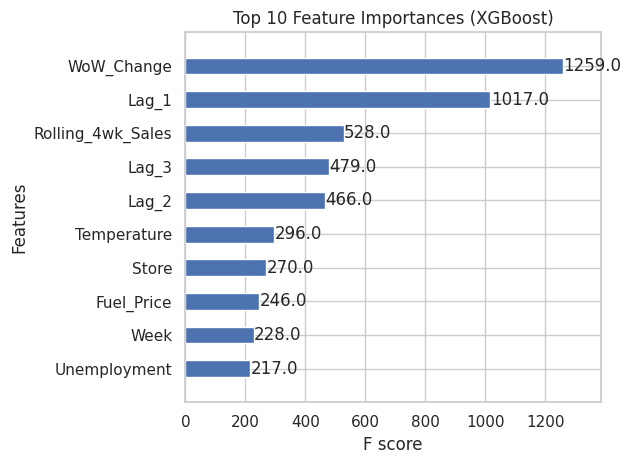

In [5]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load engineered dataset (if not already loaded)
df = pd.read_csv("Walmart_Engineered.csv", parse_dates=['Date'])

# Feature Engineering (Step 4)
df = df.sort_values(by=['Store', 'Date'])
df['Lag_1'] = df.groupby('Store')['Weekly_Sales'].shift(1)
df['Lag_2'] = df.groupby('Store')['Weekly_Sales'].shift(2)
df['Lag_3'] = df.groupby('Store')['Weekly_Sales'].shift(3)
df['WoW_Change'] = df.groupby('Store')['Weekly_Sales'].pct_change() * 100
df['Is_StartOfMonth'] = df['Date'].dt.is_month_start.astype(int)
df['Is_EndOfMonth'] = df['Date'].dt.is_month_end.astype(int)
df['Store'] = df['Store'].astype('category').cat.codes
df['Season'] = df['Season'].astype('category').cat.codes
df = df.dropna().reset_index(drop=True)
df = df.sort_values(by='Date')

# Features and Target
features = [
    'Store', 'IsHoliday', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
    'Year', 'Month', 'Week', 'DayOfWeek', 'Is_Weekend', 'Season',
    'Rolling_4wk_Sales', 'Lag_1', 'Lag_2', 'Lag_3', 'WoW_Change',
    'Is_StartOfMonth', 'Is_EndOfMonth'
]
target = 'Weekly_Sales'

# Train/Test Split
split_index = int(0.8 * len(df))
train_df = df.iloc[:split_index]
test_df = df.iloc[split_index:]
X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

# XGBoost DMatrix Conversion
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Model Parameters
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'max_depth': 6,
    'eta': 0.1,
    'seed': 42
}

# Model Training
model = xgb.train(params, dtrain, num_boost_round=100)

# Predict
y_pred = model.predict(dtest)

# Evaluation
import numpy as np
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Evaluation")
print(f"RMSE: {rmse:,.2f}")
print(f"MAE: {mae:,.2f}")
print(f"R² Score: {r2:.4f}")

# Feature Importance Plot
xgb.plot_importance(model, max_num_features=10, height=0.5)
plt.title("Top 10 Feature Importances (XGBoost)")
plt.tight_layout()
plt.show()

## Actual vs. Predicted Weekly Sales

The following plot compares actual and predicted weekly sales for the last 100 records in the test set. It visually demonstrates model accuracy and trend-following capability over recent data.


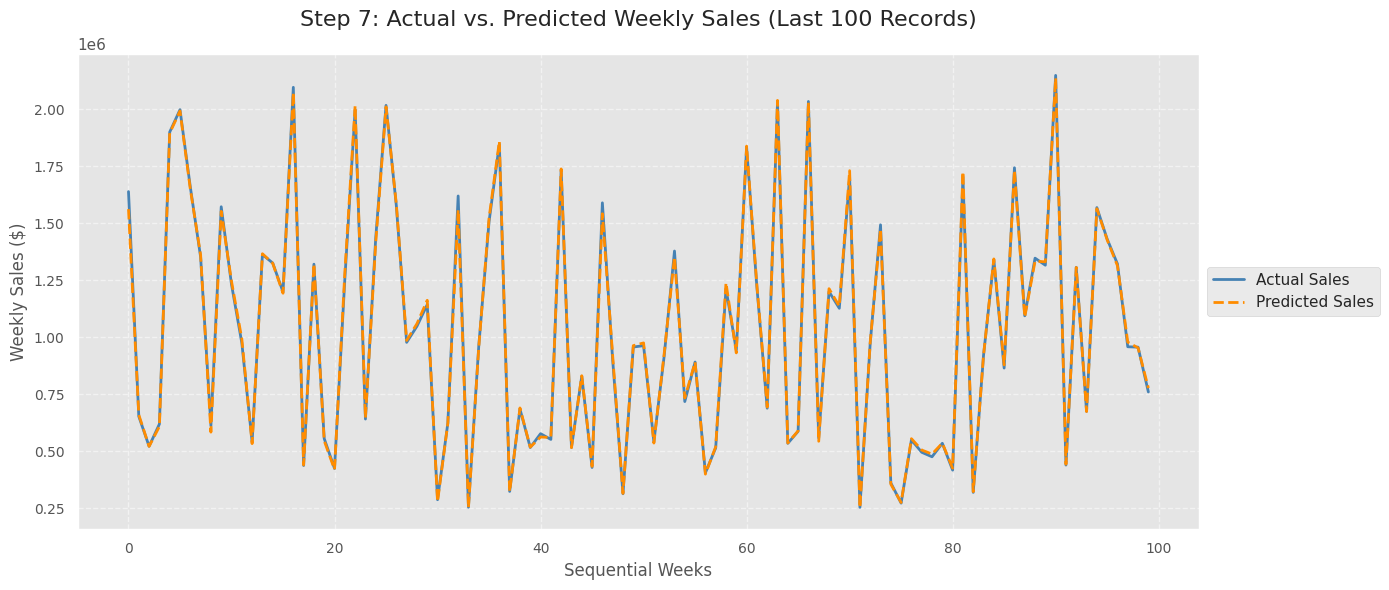

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Create last 100 points DataFrame
safe_df = pd.DataFrame({
    'Actual': y_test.values[-100:],
    'Predicted': y_pred[-100:]
})

# Use built-in clean style
plt.style.use('ggplot')  # fallback style similar to seaborn

# Plot
plt.figure(figsize=(14, 6))
plt.plot(safe_df['Actual'], label='Actual Sales', color='steelblue', linewidth=2)
plt.plot(safe_df['Predicted'], label='Predicted Sales', color='darkorange', linestyle='--', linewidth=2)

# Titles and labels
plt.title("Step 7: Actual vs. Predicted Weekly Sales (Last 100 Records)", fontsize=16, pad=20)
plt.xlabel("Sequential Weeks", fontsize=12)
plt.ylabel("Weekly Sales ($)", fontsize=12)

# Ticks and grid
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)

# Legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=11)

plt.tight_layout()
plt.show()

## Forecasting Next 4 Weeks

We simulate a real-time prediction scenario where only past data up to a cutoff date is available. Using our trained XGBoost model, we recursively forecast the next 4 weeks of sales for a selected store (`Store 0`) using a manual autoregressive loop. Forecasted values are compared with actuals for evaluation.


In [7]:
import pandas as pd
import numpy as np
import xgboost as xgb
from datetime import timedelta

# ------------------- CONFIG -------------------
cutoff_date = pd.Timestamp('2012-10-05')
store_id = df['Store'].unique()[0]        # Store 0

# ------------------- STEP 1: Prep Data -------------------
store_df = df[df['Store'] == store_id].copy().sort_values(by='Date')
history_df = store_df[store_df['Date'] <= cutoff_date].copy()
future_actual_df = store_df[
    (store_df['Date'] > cutoff_date) &
    (store_df['Date'] <= cutoff_date + pd.Timedelta(weeks=4))
][['Date', 'Weekly_Sales']]

# ------------------- STEP 2: Initialize Forecast -------------------
last_row = history_df.iloc[-1:].copy()
current_date = pd.Timestamp(last_row['Date'].values[0])
backtest_preds = []

# Use the same feature list from training
features = [
    'Store', 'IsHoliday', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
    'Year', 'Month', 'Week', 'DayOfWeek', 'Is_Weekend', 'Season',
    'Rolling_4wk_Sales', 'Lag_1', 'Lag_2', 'Lag_3', 'WoW_Change',
    'Is_StartOfMonth', 'Is_EndOfMonth'
]

# ------------------- STEP 3: Forecast Loop -------------------
for _ in range(4):  # forecast next 4 weeks
    current_date += timedelta(weeks=1)

    # Lag calculations
    lag_1 = last_row['Weekly_Sales'].values[0]
    lag_2 = last_row['Lag_1'].values[0]
    lag_3 = last_row['Lag_2'].values[0]
    rolling = np.mean([lag_1, lag_2, lag_3, last_row['Lag_3'].values[0]])
    wow_change = ((lag_1 - lag_2) / lag_2) * 100 if lag_2 != 0 else 0

    # Create new row
    new_row = last_row.copy()
    new_row['Date'] = current_date
    new_row['Year'] = current_date.year
    new_row['Month'] = current_date.month
    new_row['Week'] = current_date.isocalendar().week
    new_row['DayOfWeek'] = 4
    new_row['Is_Weekend'] = 0
    new_row['IsHoliday'] = 0
    new_row['Is_StartOfMonth'] = int(current_date.is_month_start)
    new_row['Is_EndOfMonth'] = int(current_date.is_month_end)

    new_row['Lag_1'] = lag_1
    new_row['Lag_2'] = lag_2
    new_row['Lag_3'] = lag_3
    new_row['Rolling_4wk_Sales'] = rolling
    new_row['WoW_Change'] = wow_change

    # Prediction
    dnew = xgb.DMatrix(new_row[features])
    prediction = model.predict(dnew)[0]

    backtest_preds.append({
        'Date': current_date,
        'Store': store_id,
        'Predicted_Sales': round(prediction, 2)
    })

    # Update last_row for next iteration
    last_row['Lag_3'] = lag_2
    last_row['Lag_2'] = lag_1
    last_row['Lag_1'] = prediction
    last_row['Weekly_Sales'] = prediction

# ------------------- STEP 4: Compare with Actual -------------------
backtest_df = pd.DataFrame(backtest_preds)
backtest_df = backtest_df.merge(future_actual_df, on='Date', how='left')
print("Backtest Complete — Forecast vs. Actual:")
print(backtest_df)


Backtest Complete — Forecast vs. Actual:
        Date  Store  Predicted_Sales  Weekly_Sales
0 2012-10-12      0      1817370.375    1573072.81
1 2012-10-19      0      1722504.500    1508068.77
2 2012-10-26      0      1760046.500    1493659.74
3 2012-11-02      0      1729993.625           NaN


##  Forecast vs. Actual (Bar Chart)

This plot compares forecasted and actual weekly sales for the next 4 weeks after the cutoff date for Store 0. It includes percentage error annotations to quantify model deviation from ground truth.


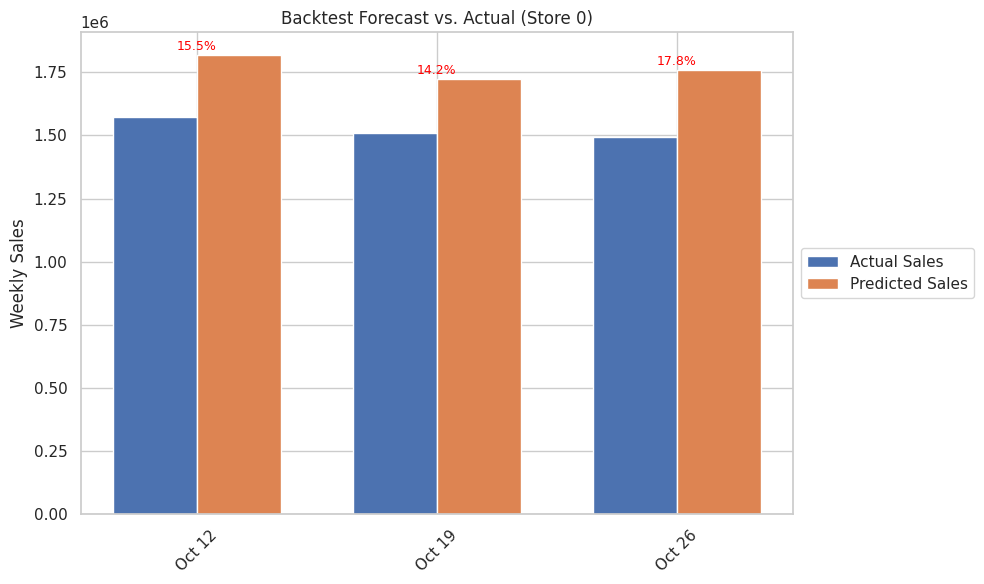

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data (remove NaNs to avoid plotting errors)
plot_df = backtest_df.dropna(subset=['Weekly_Sales'])

# Set style
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

# Bar plots: actual and predicted
bar_width = 0.35
x = range(len(plot_df))

plt.bar([i - bar_width/2 for i in x], plot_df['Weekly_Sales'], width=bar_width, label='Actual Sales')
plt.bar([i + bar_width/2 for i in x], plot_df['Predicted_Sales'], width=bar_width, label='Predicted Sales')

# Add labels
plt.xticks(x, plot_df['Date'].dt.strftime('%b %d'), rotation=45)
plt.ylabel('Weekly Sales')
plt.title('Backtest Forecast vs. Actual (Store 0)')

# Annotate % error on top
for i, row in plot_df.iterrows():
    pct_error = ((row['Predicted_Sales'] - row['Weekly_Sales']) / row['Weekly_Sales']) * 100
    plt.text(i, max(row['Predicted_Sales'], row['Weekly_Sales']) + 20000,
             f"{pct_error:.1f}%", ha='center', fontsize=9, color='red')

# Legend outside
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

In [9]:
import pandas as pd
import numpy as np
from datetime import timedelta
import xgboost as xgb

# --------- CONFIGURATION ---------
# Use the same feature set as during model training
features = [
    'Store', 'IsHoliday', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
    'Year', 'Month', 'Week', 'DayOfWeek', 'Is_Weekend', 'Season',
    'Rolling_4wk_Sales', 'Lag_1', 'Lag_2', 'Lag_3', 'WoW_Change',
    'Is_StartOfMonth', 'Is_EndOfMonth'
]

# Get unique store IDs and latest date
all_store_ids = df['Store'].unique()
latest_date = df['Date'].max()

# Initialize list to collect forecasts
all_forecasts = []

# --------- FORECAST LOOP ---------
for store_id in all_store_ids:
    store_df = df[df['Store'] == store_id].copy().sort_values(by='Date')
    last_row = store_df.iloc[-1:].copy()
    current_date = pd.Timestamp(last_row['Date'].values[0])

    for week in range(4):  # 4-week forecast
        current_date += timedelta(weeks=1)

        # Prepare autoregressive features
        lag_1 = last_row['Weekly_Sales'].values[0]
        lag_2 = last_row['Lag_1'].values[0]
        lag_3 = last_row['Lag_2'].values[0]
        rolling = np.mean([lag_1, lag_2, lag_3, last_row['Lag_3'].values[0]])
        wow_change = ((lag_1 - lag_2) / lag_2) * 100 if lag_2 != 0 else 0

        # Build new row
        new_row = last_row.copy()
        new_row['Date'] = current_date
        new_row['Year'] = current_date.year
        new_row['Month'] = current_date.month
        new_row['Week'] = current_date.isocalendar().week
        new_row['DayOfWeek'] = 4  # assume Friday
        new_row['Is_Weekend'] = 0
        new_row['IsHoliday'] = 0
        new_row['Is_StartOfMonth'] = int(current_date.is_month_start)
        new_row['Is_EndOfMonth'] = int(current_date.is_month_end)

        # Update dynamic features
        new_row['Lag_1'] = lag_1
        new_row['Lag_2'] = lag_2
        new_row['Lag_3'] = lag_3
        new_row['Rolling_4wk_Sales'] = rolling
        new_row['WoW_Change'] = wow_change

        # Make prediction
        dnew = xgb.DMatrix(new_row[features])
        prediction = model.predict(dnew)[0]

        # Store result
        all_forecasts.append({
            'Store': store_id,
            'Date': current_date,
            'Predicted_Weekly_Sales': round(prediction, 2)
        })

        # Update row for next week
        last_row['Lag_3'] = lag_2
        last_row['Lag_2'] = lag_1
        last_row['Lag_1'] = prediction
        last_row['Weekly_Sales'] = prediction

# --------- FINAL OUTPUT ---------
forecast_all_df = pd.DataFrame(all_forecasts)
print("✅ 4-Week Forecast for All Stores Complete")
print(forecast_all_df.head())

#  Save to CSV
forecast_all_df.to_csv("4_week_forecast_all_stores.csv", index=False)

✅ 4-Week Forecast for All Stores Complete
   Store       Date  Predicted_Weekly_Sales
0      0 2012-11-02             1480161.750
1      0 2012-11-09             1475421.125
2      0 2012-11-16             1478213.750
3      0 2012-11-23             1478213.750
4      5 2012-11-02             1436251.000


## Objective 1: 4-Week Forecast for All Stores

We generalize the autoregressive forecasting loop to predict sales for all Walmart stores over the next 4 weeks. Each forecast uses the latest available store-level data and updates lags iteratively per week. Final predictions are saved as a CSV file for reporting or dashboard integration.


In [10]:
import pandas as pd
import numpy as np
from datetime import timedelta
import xgboost as xgb

# --------- CONFIGURATION ---------
# Use the same feature set as during model training
features = [
    'Store', 'IsHoliday', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
    'Year', 'Month', 'Week', 'DayOfWeek', 'Is_Weekend', 'Season',
    'Rolling_4wk_Sales', 'Lag_1', 'Lag_2', 'Lag_3', 'WoW_Change',
    'Is_StartOfMonth', 'Is_EndOfMonth'
]

# Get unique store IDs and latest date
all_store_ids = df['Store'].unique()
latest_date = df['Date'].max()

# Initialize list to collect forecasts
all_forecasts = []

# --------- FORECAST LOOP ---------
for store_id in all_store_ids:
    store_df = df[df['Store'] == store_id].copy().sort_values(by='Date')
    last_row = store_df.iloc[-1:].copy()
    current_date = pd.Timestamp(last_row['Date'].values[0])

    for week in range(4):  # 4-week forecast
        current_date += timedelta(weeks=1)

        # Prepare autoregressive features
        lag_1 = last_row['Weekly_Sales'].values[0]
        lag_2 = last_row['Lag_1'].values[0]
        lag_3 = last_row['Lag_2'].values[0]
        rolling = np.mean([lag_1, lag_2, lag_3, last_row['Lag_3'].values[0]])
        wow_change = ((lag_1 - lag_2) / lag_2) * 100 if lag_2 != 0 else 0

        # Build new row
        new_row = last_row.copy()
        new_row['Date'] = current_date
        new_row['Year'] = current_date.year
        new_row['Month'] = current_date.month
        new_row['Week'] = current_date.isocalendar().week
        new_row['DayOfWeek'] = 4  # assume Friday
        new_row['Is_Weekend'] = 0
        new_row['IsHoliday'] = 0
        new_row['Is_StartOfMonth'] = int(current_date.is_month_start)
        new_row['Is_EndOfMonth'] = int(current_date.is_month_end)

        # Update dynamic features
        new_row['Lag_1'] = lag_1
        new_row['Lag_2'] = lag_2
        new_row['Lag_3'] = lag_3
        new_row['Rolling_4wk_Sales'] = rolling
        new_row['WoW_Change'] = wow_change

        # Make prediction
        dnew = xgb.DMatrix(new_row[features])
        prediction = model.predict(dnew)[0]

        # Store result
        all_forecasts.append({
            'Store': store_id,
            'Date': current_date,
            'Predicted_Weekly_Sales': round(prediction, 2)
        })

        # Update row for next week
        last_row['Lag_3'] = lag_2
        last_row['Lag_2'] = lag_1
        last_row['Lag_1'] = prediction
        last_row['Weekly_Sales'] = prediction

# --------- FINAL OUTPUT ---------
forecast_all_df = pd.DataFrame(all_forecasts)
print("4-Week Forecast for All Stores Complete")
print(forecast_all_df.head())

#  Save to CSV
forecast_all_df.to_csv("4_week_forecast_all_stores.csv", index=False)

4-Week Forecast for All Stores Complete
   Store       Date  Predicted_Weekly_Sales
0      0 2012-11-02             1480161.750
1      0 2012-11-09             1475421.125
2      0 2012-11-16             1478213.750
3      0 2012-11-23             1478213.750
4      5 2012-11-02             1436251.000


## Objective 2: Analyze Holiday Impact on Sales

We aim to understand how holiday weeks affect Walmart’s weekly sales using both visualizations and statistical methods. This includes:

- Percentage uplift in sales during holidays
- Statistical significance test (t-test)
- Store-level holiday effect analysis


In [11]:
holiday_avg = df[df['IsHoliday'] == 1]['Weekly_Sales'].mean()
nonholiday_avg = df[df['IsHoliday'] == 0]['Weekly_Sales'].mean()
lift = ((holiday_avg - nonholiday_avg) / nonholiday_avg) * 100

print(f"Average Sales (Holiday Weeks): ${holiday_avg:,.2f}")
print(f"Average Sales (Non-Holiday Weeks): ${nonholiday_avg:,.2f}")
print(f"Sales Lift During Holidays: {lift:.2f}%")


Average Sales (Holiday Weeks): $1,128,303.39
Average Sales (Non-Holiday Weeks): $1,041,167.75
Sales Lift During Holidays: 8.37%


In [12]:
from scipy.stats import ttest_ind

holiday_sales = df[df['IsHoliday'] == 1]['Weekly_Sales']
non_holiday_sales = df[df['IsHoliday'] == 0]['Weekly_Sales']

t_stat, p_val = ttest_ind(holiday_sales, non_holiday_sales, equal_var=False)
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_val:.4f}")

if p_val < 0.05:
    print("✅ Sales difference is statistically significant (p < 0.05)")
else:
    print("⚠️ Sales difference is not statistically significant")


T-statistic: 2.69
P-value: 0.0073
✅ Sales difference is statistically significant (p < 0.05)


In [13]:
holiday_effect = df.groupby(['Store', 'IsHoliday'])['Weekly_Sales'].mean().unstack()
holiday_effect['Lift (%)'] = ((holiday_effect[1] - holiday_effect[0]) / holiday_effect[0]) * 100
holiday_effect = holiday_effect.sort_values('Lift (%)', ascending=False)

print("Top 5 Stores with Highest Holiday Sales Uplift:")
print(holiday_effect[['Lift (%)']].head())


Top 5 Stores with Highest Holiday Sales Uplift:
IsHoliday   Lift (%)
Store               
6          21.785739
34         18.470801
4          15.569500
28         15.108287
14         14.912761


## Objective 3: Identify Stores with the Most Volatile Weekly Sales

Volatility helps us identify which Walmart stores have the most unpredictable weekly sales. This insight can inform inventory strategies, staffing, and promotional planning.

We use **standard deviation** of `Weekly_Sales` for each store as the volatility measure.


In [14]:
# Group by store and calculate standard deviation of sales
store_std = df.groupby('Store')['Weekly_Sales'].std().sort_values(ascending=False)

# Show top 5 most volatile stores
print("🔝 Top 5 Most Volatile Stores (by Std Dev):")
print(store_std.head())


🔝 Top 5 Most Volatile Stores (by Std Dev):
Store
13    317934.503541
9     306022.293365
19    280055.602487
3     270687.803819
12    270353.019118
Name: Weekly_Sales, dtype: float64
